# Лабораторная работа № 3    
Текст задания:  
1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. 4 Выберите способ масштабирования (например, нормализацию или стандартизацию);
4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6. Заполните пропущенные значения в данных;
7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')
from pylab import rcParams

house = pd.read_csv('kc_house_data.csv')
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных  
id - Уникальный идентификатор для каждого проданного дома.  
date - Дата продажи дома.  
price - Цена каждого проданного дома.  
bedrooms - Количество спален.  
bathrooms - Количество ванных комнат, где 5 - комната с туалетом, но без душа.  
sqft_living - Площадь внутренней жилой площади квартир (Квадратные метры).  
sqft_lot - Площадь земельного участка (Квадратные метры).  
floors - Количество этажей.  
waterfront - Фиктивная переменная для того, выходили ли окна квартиры на набережную или нет.  
view - Индекс (от 0 до 4) того, насколько хорошим был вид из окна.  
condition - Индекс (от 1 до 5) сосстояния квартиры.  
grade - показатель (от 1 до 13), где 1-3 - плохой уровень строительства и проектирования зданий, 7 - имеют средний уровень строительства и проектирования, а 11-13 - имеют высокий уровень качества строительства и проектирования.  
sqft_above - Площадь внутреннего пространства, находящегося над уровнем земли (Квадратные метры).  
sqft_basement - Площадь внутреннего жилого пространсва, находящегося ниже уровня земли (Квадратные метры).  
yr_built - Год, когда дом был первоначально построен.  
yr_renovated - Год последнего ремонта дома.  
zipcode - Почтовый индекс территории, на которой находится дом.  
lat - Широта.  
long - Долгота.  
sqft_living15 - Площадь межкомнатного пространства жилплощади до близжайших 15 соседей.  
sqft_lot15 - Площадь земельных участков до близжайших 15 соседей.  

## 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [2]:
print("Количество строк до удаления дубликатов: ", len(house.index))
house.drop_duplicates(keep = 'first', inplace = True)
print("Количество строк после удаления дубликатов: ", len(house.index))

Количество строк до удаления дубликатов:  21613
Количество строк после удаления дубликатов:  21613


## 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

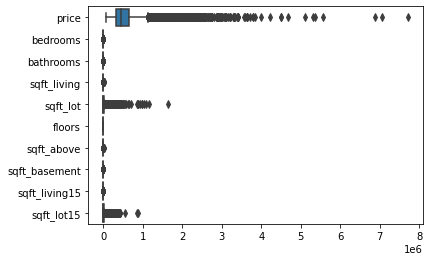

In [3]:
numerical_signs = house[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]
sns.boxplot(data = numerical_signs, orient = 'h')

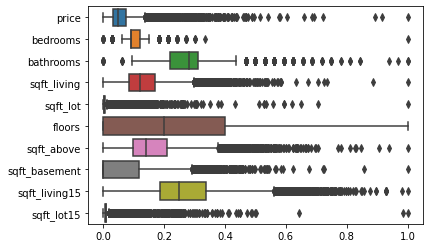

In [4]:
scaler = MinMaxScaler()
columns = numerical_signs.columns
numerical_signs[columns] = scaler.fit_transform(numerical_signs[columns])
sns.boxplot(data = numerical_signs, orient = 'h')

## 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [5]:
def dummy_code(data, feature):
    for i in data[feature].unique():
        data[feature + ' = ' + str(i)] = (data[feature] == i).astype(float)

dummy_code(house, 'view')
house.drop(['view'], axis='columns', inplace=True)
house = house[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view = 0', 'view = 1', 'view = 2', 'view = 3', 'view = 4']]
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,view = 0,view = 1,view = 2,view = 3,view = 4
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,...,98178,47.5112,-122.257,1340,5650,1.0,0.0,0.0,0.0,0.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,...,98125,47.7210,-122.319,1690,7639,1.0,0.0,0.0,0.0,0.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,...,98028,47.7379,-122.233,2720,8062,1.0,0.0,0.0,0.0,0.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,...,98136,47.5208,-122.393,1360,5000,1.0,0.0,0.0,0.0,0.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,...,98074,47.6168,-122.045,1800,7503,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,3,...,98103,47.6993,-122.346,1530,1509,1.0,0.0,0.0,0.0,0.0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,3,...,98146,47.5107,-122.362,1830,7200,1.0,0.0,0.0,0.0,0.0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,3,...,98144,47.5944,-122.299,1020,2007,1.0,0.0,0.0,0.0,0.0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,3,...,98027,47.5345,-122.069,1410,1287,1.0,0.0,0.0,0.0,0.0


## 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

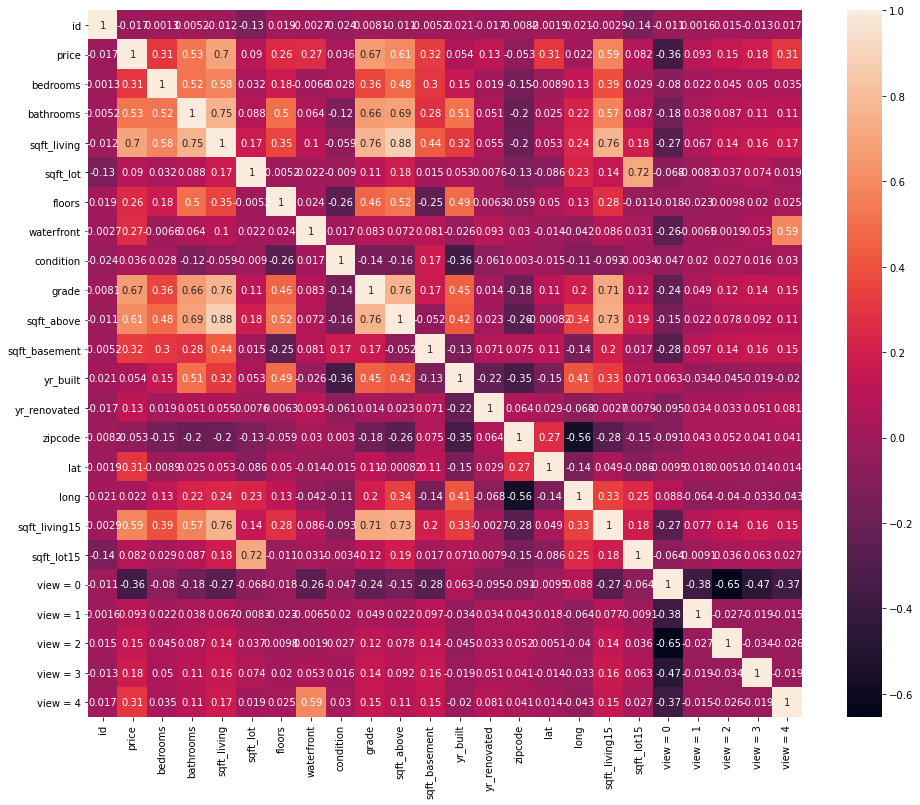

In [6]:
rcParams['figure.figsize'] = 16, 13
sns.heatmap(house.corr(), annot = True)
plt.show()

## 6. Заполните пропущенные значения в данных;

In [7]:
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
view = 0         0
view = 1         0
view = 2         0
view = 3         0
view = 4         0
dtype: int64

Пропущенных значений нет

## 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [8]:
#Линейная регрессия без использования регуляризаторов
house.drop(['date'], axis=1, inplace = True)
data_x, data_y = house.drop(['price'], axis=1), house['price']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 123)

reg = LinearRegression()
reg.fit(train_x, train_y)
pred_reg = reg.predict(test_x)

pearson, pearson_p_value = pearsonr(pred_reg, test_y)
spearman, spearman_p_value = spearmanr(pred_reg, test_y)
print("Коэффициент Пирсона: ", pearson, "\nКоэффициент Спримена: ", spearman)

if pearson_p_value < 0.05 and spearman_p_value < 0.05:
    print('p-value is good')
else:
    print('p-value is not good')

Коэффициент Пирсона:  0.8435012637560473 
Коэффициент Спримена:  0.8574818044734654
p-value is good


In [9]:
#Линейная регрессия, LASSO регуляризатор
lasso = Lasso(alpha=0.1)
lasso.fit(train_x,train_y)
lasso_reg = lasso.predict(X = test_x)

pearson, p_value_pearson = pearsonr(lasso_reg , test_y)
spearman, p_value_spearman = spearmanr(lasso_reg , test_y)

print('Коэффициент Пирсона:', pearson)
print('Коэффициент Спирмена', spearman)

if p_value_pearson < 0.05 and p_value_spearman < 0.05:
    print('p-value is good')
else:
    print('p-value is not good')

Коэффициент Пирсона: 0.843501408610678
Коэффициент Спирмена 0.8574815740484741
p-value is good
